<a href="https://colab.research.google.com/github/pingping-0606/Python_dataviz2024/blob/main/HW9(%E0%B9%81%E0%B8%81%E0%B9%89).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW9 present radar chart data india คิดรวม

In [40]:
import pandas as pd

In [41]:
import os

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
path_to_movie = '/content/drive/MyDrive/data_viz_2024/IMDb Movies India.csv'

In [44]:
data_india = pd.read_csv(path_to_movie, encoding='latin-1')
data_india

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
#ตรวจสอบค่า null
data_india.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [46]:
data_india = data_india.dropna(subset=['Rating', 'Votes','Duration','Genre', 'Director'])

In [47]:
data_india['Year'] =data_india['Year'].str.replace('(', '').str.replace(')', '').astype(int)
data_india['Duration'] = data_india['Duration'].str.replace(' min', '').astype(int)
data_india['Votes'] = data_india['Votes'].str.replace(',', '')

<ipython-input-47-d4b5746bc2e8>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-47-d4b5746bc2e8>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-47-d4b5746bc2e8>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [48]:
# ตรวจสอบและแปลงคอลัมน์ Votes เป็น float
data_india['Votes'] = pd.to_numeric(data_india['Votes'], errors='coerce')

<ipython-input-48-19497a595d1c>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [49]:
data_india

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,2001,153,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [51]:
#หลังdropnaแล้วข้อมูลเหลือกี่%จากเดิม

print(f"ข้อมูลเหลือ {(len(data_india) / len(pd.read_csv('/content/drive/MyDrive/data_viz_2024/IMDb Movies India.csv', encoding='latin-1'))) * 100:.2f}% จากเดิม")

ข้อมูลเหลือ 37.52% จากเดิม


In [52]:
data_india.isnull().sum()

,0
Name,0
Year,0
Duration,0
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,73
Actor 2,114
Actor 3,160


In [53]:
# prompt: split value in column genre by ',' and make more column for each of those

import pandas as pd
# Split the 'Genre' column by ',' and create new columns
genre_split = data_india['Genre'].str.split(',', expand=True)

# Rename the new columns
genre_split.columns = ['Genre1', 'Genre2', 'Genre3']

# Concatenate the new columns with the original DataFrame
data_india = pd.concat([data_india, genre_split], axis=1)

# Display the updated DataFrame
data_india.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre1,Genre2,Genre3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Drama,None,None
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Comedy,Romance,None
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,Comedy,Drama,Musical
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,Drama,Romance,War
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,Horror,Mystery,Thriller


In [54]:
# prompt: delete space in the value in Genre1 Genre2 Genre3

for col in ['Genre1', 'Genre2', 'Genre3']:
  data_india[col] = data_india[col].str.strip() if data_india[col].dtype == 'object' else data_india[col]


In [55]:
data_india

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre1,Genre2,Genre3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Drama,None,None
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Comedy,Romance,None
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,Comedy,Drama,Musical
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,Drama,Romance,War
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,Horror,Mystery,Thriller
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana,Drama,None,None
15494,Zubeidaa,2001,153,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee,Biography,Drama,History
15503,Zulm Ki Zanjeer,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth,Action,Crime,Drama
15505,Zulmi,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,Action,Drama,None


* ยังไม่เลือก

In [56]:
# prompt: เลือกผู้กำกับที่มี Rating และ Votes มากกว่า 75%
# top_directors = movie_df[(movie_df['Rating'] >= rating_q3) & (movie_df['Votes'] >= tes_q3)]['Director'].value_counts()
#และ คิดเกณฑ์คะแนนถ่วงน้ำหนัก Votes และ rating ให้ rating 60% และ Votes 40% ถ่วงให้ไม่เกิน 100%
# Calculate the 75th percentile for Rating and Votes
rating_q3 = data_india['Rating'].quantile(0.75)
tes_q3 = data_india['Votes'].quantile(0.75)

# Filter the DataFrame to include only directors with Rating and Votes above the 75th percentile
top_directors = data_india[(data_india['Rating'] >= rating_q3) & (data_india['Votes'] >= tes_q3)]['Director'].value_counts()
top_directors

,count
Director,
Yash Chopra,11
Hrishikesh Mukherjee,10
Anurag Kashyap,9
Ram Gopal Varma,8
Nagesh Kukunoor,8
...,...
Aatish Kapadia,1
Faruk Kabir,1
Rakesh Roshan,1


In [57]:
top_directors.head(10)

,count
Director,
Yash Chopra,11
Hrishikesh Mukherjee,10
Anurag Kashyap,9
Ram Gopal Varma,8
Nagesh Kukunoor,8
Vishal Bhardwaj,7
Sanjay Leela Bhansali,7
Raj Kapoor,7
Priyadarshan,7


In [58]:
# ไว้ทดเช็คข้อมูล
data_india[data_india['Director'] == 'Hrishikesh Mukherjee']

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre1,Genre2,Genre3
479,Aashiq,1962,150,Romance,6.7,64,Hrishikesh Mukherjee,Raj Kapoor,Padmini,Nanda,Romance,None,None
487,Aashirwad,1968,146,Drama,7.3,203,Hrishikesh Mukherjee,Ashok Kumar,Sanjeev Kumar,Sumita Sanyal,Drama,None,None
563,Abhimaan,1973,122,"Drama, Musical",7.9,2665,Hrishikesh Mukherjee,Amitabh Bachchan,Jaya Bachchan,Asrani,Drama,Musical,None
806,Alaap,1977,160,"Drama, Musical",6.7,327,Hrishikesh Mukherjee,Amitabh Bachchan,Rekha,Chhayadevi,Drama,Musical,None
981,Anand,1971,122,"Drama, Musical",8.3,31937,Hrishikesh Mukherjee,Rajesh Khanna,Amitabh Bachchan,Sumita Sanyal,Drama,Musical,None
993,Anari,1959,166,"Comedy, Drama, Musical",7.9,740,Hrishikesh Mukherjee,Raj Kapoor,Nutan,Lalita Pawar,Comedy,Drama,Musical
1174,Anupama,1966,148,"Drama, Romance",7.4,416,Hrishikesh Mukherjee,Dharmendra,Sharmila Tagore,Shashikala,Drama,Romance,None
1177,Anuradha,1960,141,"Drama, Romance",6.6,196,Hrishikesh Mukherjee,Balraj Sahni,Leela Naidu,Abhi Bhattacharya,Drama,Romance,None
1325,Asli-Naqli,1962,145,"Drama, Musical, Romance",7.5,257,Hrishikesh Mukherjee,Dev Anand,Sadhana,Nasir Hussain,Drama,Musical,Romance
1927,Bawarchi,1972,130,"Comedy, Musical, Drama",8.0,3793,Hrishikesh Mukherjee,Rajesh Khanna,Jaya Bachchan,Usha Kiran,Comedy,Musical,Drama


In [59]:
# prompt: ดึงข้อมูลของ Yash Chopra, Ram Gopal Varma, Hrishikesh Mukherjee, Anurag Kashyap, Nagesh Kukunoor มาเป็นdataframeใหม่ ทด

directors_to_extract = ['Yash Chopra', 'Ram Gopal Varma', 'Hrishikesh Mukherjee']
top = data_india[data_india['Director'].isin(directors_to_extract)].copy()
top


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre1,Genre2,Genre3
22,12 O'Clock,2021,105,"Horror, Thriller",4.4,63,Ram Gopal Varma,Mithun Chakraborty,Makrand Deshpande,Dalip Tahil,Horror,Thriller,None
216,Aadmi Aur Insaan,1969,168,"Drama, Romance, Thriller",6.2,149,Yash Chopra,Dharmendra,Saira Banu,Feroz Khan,Drama,Romance,Thriller
479,Aashiq,1962,150,Romance,6.7,64,Hrishikesh Mukherjee,Raj Kapoor,Padmini,Nanda,Romance,None,None
487,Aashirwad,1968,146,Drama,7.3,203,Hrishikesh Mukherjee,Ashok Kumar,Sanjeev Kumar,Sumita Sanyal,Drama,None,None
563,Abhimaan,1973,122,"Drama, Musical",7.9,2665,Hrishikesh Mukherjee,Amitabh Bachchan,Jaya Bachchan,Asrani,Drama,Musical,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14460,Trishul,1978,167,"Action, Drama, Musical",7.7,2086,Yash Chopra,Amitabh Bachchan,Sanjeev Kumar,Shashi Kapoor,Action,Drama,Musical
14816,Veerappan,2016,125,"Action, Biography, Crime",5.3,711,Ram Gopal Varma,Sachiin Joshi,Sandeep Bharadwaj,Usha Jadhav,Action,Biography,Crime
14826,Veer-Zaara,2004,192,"Drama, Family, Musical",7.8,50101,Yash Chopra,Shah Rukh Khan,Preity Zinta,Rani Mukerji,Drama,Family,Musical
14864,Vijay,1988,172,"Action, Drama, Romance",5.6,219,Yash Chopra,Anil Kapoor,Rajesh Khanna,Rishi Kapoor,Action,Drama,Romance


In [60]:
# ทดดูภาพรวม Genre
# prompt: Using dataframe top: สร้าง bar  นับจำนวน Genre1  Genre2  Genre3 ของ director ใช้ px

import plotly.express as px

# Group by director and count the number of each genre
genre_counts = top.groupby(['Director', 'Genre1'])['Name'].count().reset_index(name='Count')
genre_counts2 = top.groupby(['Director', 'Genre2'])['Name'].count().reset_index(name='Count')
genre_counts3 = top.groupby(['Director', 'Genre3'])['Name'].count().reset_index(name='Count')

# Create a bar chart using Plotly Express
fig = px.bar(genre_counts, x='Director', y='Count', color='Genre1', barmode='group', title='Genre1 Count by Director')
fig.show()

fig2 = px.bar(genre_counts2, x='Director', y='Count', color='Genre2', barmode='group', title='Genre2 Count by Director')
fig2.show()

fig3 = px.bar(genre_counts3, x='Director', y='Count', color='Genre3', barmode='group', title='Genre3 Count by Director')
fig3.show()



In [61]:
# prompt: นับจำนวน genre ที่director แต่ละคนทำ เช่นทำ Drama กับ Action นับเป็น 2 genre พร้อมบอกด้วยมีอะไรบ้าง

# Group by director and collect unique genres
director_genres = data_india.groupby('Director').agg({'Genre1': lambda x: set(x.dropna()),
                                           'Genre2': lambda x: set(x.dropna()),
                                           'Genre3': lambda x: set(x.dropna())})

# Combine genres from all three columns into a single set
director_genres['All_Genres'] = director_genres.apply(lambda row: row['Genre1'].union(row['Genre2']).union(row['Genre3']), axis=1)

# Calculate the number of unique genres for each director
director_genres['Genre_Count'] = director_genres['All_Genres'].apply(len)

# Display the results
print(director_genres[['Genre_Count', 'All_Genres']].to_string())


                              Genre_Count                                                                                                          All_Genres
Director                                                                                                                                                     
A. Bhimsingh                            8                                              {Musical, Romance, Drama, Biography, Family, Thriller, Action, Comedy}
A. Jagannathan                          5                                                                            {Drama, Romance, Mystery, Action, Crime}
A. Majid                                2                                                                                                     {Drama, Action}
A. Muthu                                2                                                                                                  {Romance, Musical}
A. Salaam                               4           

In [62]:
allindiagenre = list(data_india['Genre1'])+list(data_india['Genre2'])+list(data_india['Genre3'])
allindiagenre

['Drama',
 'Comedy',
 'Comedy',
 'Drama',
 'Horror',
 'Action',
 'Drama',
 'Horror',
 'Horror',
 'Comedy',
 'Comedy',
 'Comedy',
 'Crime',
 'Horror',
 'Comedy',
 'Drama',
 'Drama',
 'Drama',
 'Action',
 'Action',
 'Drama',
 'Horror',
 'Horror',
 'Drama',
 'Horror',
 'Action',
 'Action',
 'Thriller',
 'Comedy',
 'Adventure',
 'Action',
 'Comedy',
 'Action',
 'Crime',
 'Comedy',
 'Thriller',
 'Drama',
 'Sport',
 'Biography',
 'Drama',
 'Horror',
 'Comedy',
 'Crime',
 'Comedy',
 'Comedy',
 'Drama',
 'Adventure',
 'Action',
 'Comedy',
 'Drama',
 'Crime',
 'Drama',
 'Horror',
 'Horror',
 'Horror',
 'Drama',
 'Drama',
 'Drama',
 'Thriller',
 'Action',
 'Action',
 'Horror',
 'Drama',
 'Comedy',
 'Action',
 'Crime',
 'Documentary',
 'Drama',
 'Drama',
 'Thriller',
 'Action',
 'Action',
 'Adventure',
 'Mystery',
 'Action',
 'Comedy',
 'Musical',
 'Crime',
 'Drama',
 'Drama',
 'Drama',
 'Documentary',
 'Horror',
 'Drama',
 'Action',
 'Comedy',
 'Action',
 'Drama',
 'Drama',
 'Documentary',
 'Rom

In [64]:
unique_genres = list(set([genre for genre in allindiagenre if genre is not None]))
print(unique_genres)

['Biography', 'Horror', 'Family', 'Sport', 'Fantasy', 'Animation', 'Mystery', 'Crime', 'Comedy', 'History', 'Musical', 'Documentary', 'Romance', 'Drama', 'Western', 'War', 'News', 'Thriller', 'Sci-Fi', 'Music', 'Action', 'Adventure']


In [66]:
len(set(allindiagenre))

23

In [68]:
# prompt: อยากสร้างคะแนน diversity โดยคิดจาก director_genres[['Genre_Count', 'All_Genres'] (ของdata_india) สเกลคะแนนเต็ม10

# Calculate the maximum possible genre count (diversity)
max_genre_count = len(set(allindiagenre))  # Use allindiagenre to get the maximum possible genre count

# Create a new column for the diversity score
director_genres['Diversity_Score'] = (director_genres['Genre_Count'] / max_genre_count) * 10

# Display the results with the diversity score
print(director_genres[['Genre_Count', 'All_Genres', 'Diversity_Score']].to_string())

                              Genre_Count                                                                                                          All_Genres  Diversity_Score
Director                                                                                                                                                                      
A. Bhimsingh                            8                                              {Musical, Romance, Drama, Biography, Family, Thriller, Action, Comedy}         3.478261
A. Jagannathan                          5                                                                            {Drama, Romance, Mystery, Action, Crime}         2.173913
A. Majid                                2                                                                                                     {Drama, Action}         0.869565
A. Muthu                                2                                                                                    

In [69]:
director_genres['Diversity_Score']

,Diversity_Score
Director,
A. Bhimsingh,3.478261
A. Jagannathan,2.173913
A. Majid,0.869565
A. Muthu,0.869565
A. Salaam,1.739130
...,...
Zia Sarhadi,1.739130
Ziaullah Khan,0.434783
Zoya Akhtar,2.608696


In [70]:
# prompt: อยากสร้างตัวแปร experience โดยคิดจาก ปี(Year)ใหม่สุดของหนัง(Name)ลบกับปี(Year)เก่าสุดของหนัง(Name) ของDirectorแต่ละคน

# Group by director and get the minimum and maximum year for each director
director_experience = data_india.groupby('Director').agg({'Year': ['min', 'max']})

# Calculate the experience by subtracting the minimum year from the maximum year
director_experience['Experience'] = director_experience['Year']['max'] - director_experience['Year']['min']

# Display the experience for each director
print(director_experience['Experience'])

# You can merge this experience data back into your top DataFrame if needed
# top = top.merge(director_experience['Experience'], on='Director', how='left')



Director
A. Bhimsingh      16
A. Jagannathan    10
A. Majid           0
A. Muthu           0
A. Salaam         13
                  ..
Zia Sarhadi        5
Ziaullah Khan      0
Zoya Akhtar       11
Zubair Khan        0
Zunaid Memon       0
Name: Experience, Length: 2540, dtype: int64


In [71]:
director_experience['Experience']

,Experience
Director,
A. Bhimsingh,16
A. Jagannathan,10
A. Majid,0
A. Muthu,0
A. Salaam,13
...,...
Zia Sarhadi,5
Ziaullah Khan,0
Zoya Akhtar,11


* rating --avg
* duration--avg
* diversity
* movie count
* experience

In [72]:
# prompt: box plot ของ votes ของ director แต่ละคน ทด

import plotly.express as px

fig = px.box(data_india, x='Director', y='Votes', title='Box Plot of Votes by Director')
fig.show()


In [73]:

import plotly.express as px

fig = px.box(top, x='Director', y='Votes', title='Box Plot of Votes by Director')
fig.show()

In [74]:
# prompt: box plot ของ rating ของ director แต่ละคน

fig = px.box(top, x='Director', y='Rating', title='Box Plot of Rating by Director')
fig.show()


In [75]:
# prompt: box plot ของ duration ของ director แต่ละคน

fig = px.box(top, x='Director', y='Duration', title='Box Plot of Duration by Director')
fig.show()


In [76]:
# prompt: ทำตารางรวม rating (ค่าเฉลี่ย)
# duration (ค่าเฉลี่ย)
# diversity
# movie count
# experience ของ director แต่ละคน

# Create a new DataFrame to store the aggregated data
director_summary = pd.DataFrame()

# Calculate the average rating for each director
director_summary['Average_Rating'] = data_india.groupby('Director')['Rating'].mean()

# Calculate the average duration for each director
director_summary['Average_Duration'] = data_india.groupby('Director')['Duration'].mean()

# Get the diversity score from the director_genres DataFrame
director_summary['Diversity_Score'] = director_genres['Diversity_Score']

# Count the number of movies for each director
director_summary['Movie_Count'] = data_india.groupby('Director')['Name'].count()

# Get the experience from the director_experience DataFrame
director_summary['Experience'] = director_experience['Experience']


# Display the summary table
print(director_summary)


                Average_Rating  Average_Duration  Diversity_Score  \
Director                                                            
A. Bhimsingh          6.785714        151.214286         3.478261   
A. Jagannathan        5.833333        141.000000         2.173913   
A. Majid              5.700000        162.000000         0.869565   
A. Muthu              3.000000        143.000000         0.869565   
A. Salaam             5.575000        130.250000         1.739130   
...                        ...               ...              ...   
Zia Sarhadi           6.366667        146.000000         1.739130   
Ziaullah Khan         5.600000        110.000000         0.434783   
Zoya Akhtar           6.800000        146.571429         2.608696   
Zubair Khan           5.400000        113.000000         0.434783   
Zunaid Memon          6.400000        144.000000         1.304348   

                Movie_Count  Experience  
Director                                 
A. Bhimsingh      

In [77]:
director_summary

,Average_Rating,Average_Duration,Diversity_Score,Movie_Count,Experience
Director,,,,,
A. Bhimsingh,6.785714,151.214286,3.478261,14,16
A. Jagannathan,5.833333,141.000000,2.173913,3,10
A. Majid,5.700000,162.000000,0.869565,1,0
A. Muthu,3.000000,143.000000,0.869565,1,0
A. Salaam,5.575000,130.250000,1.739130,4,13
...,...,...,...,...,...
Zia Sarhadi,6.366667,146.000000,1.739130,3,5
Ziaullah Khan,5.600000,110.000000,0.434783,1,0
Zoya Akhtar,6.800000,146.571429,2.608696,7,11


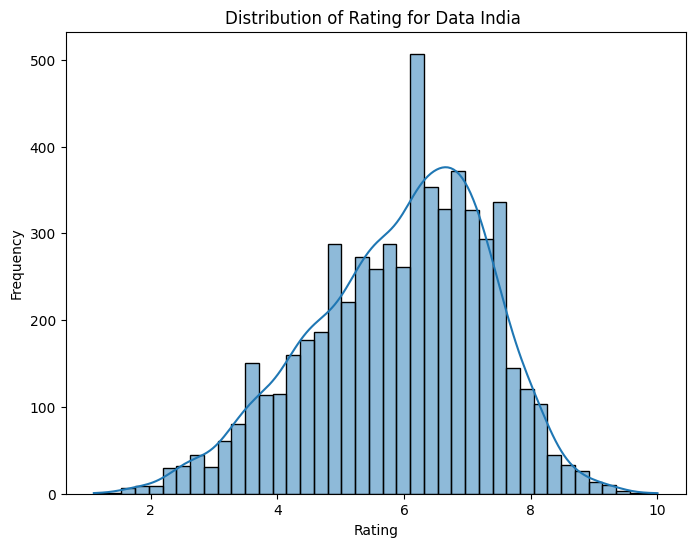

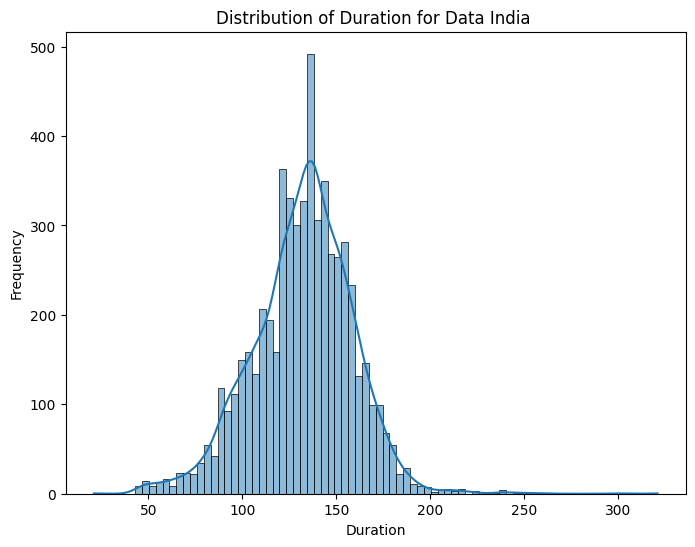

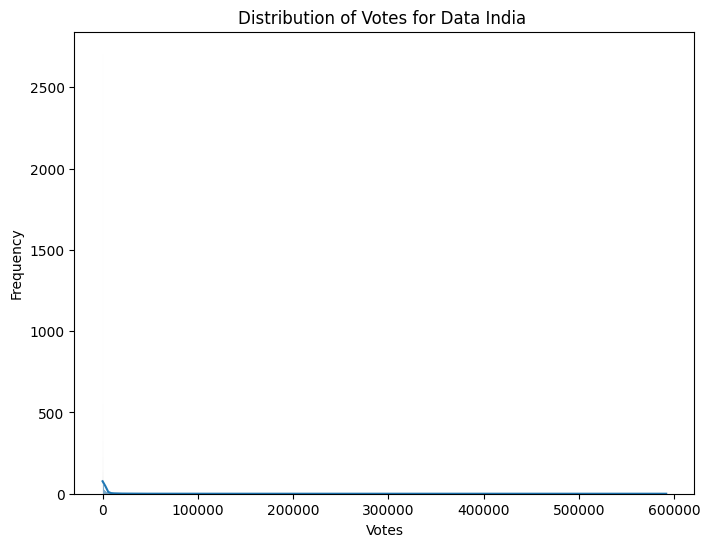

In [84]:
# prompt: ดูการแจกแจงของ data india  ว่าเป็นปกติไหม

import seaborn as sns
import matplotlib.pyplot as plt

# Select the numerical columns you want to analyze
numerical_columns = ['Rating', 'Duration', 'Votes']

# Create a loop to generate distribution plots for each column
for column in numerical_columns:
  plt.figure(figsize=(8, 6))  # Adjust figure size as needed
  sns.histplot(data_india[column], kde=True)  # Histogram with kernel density estimation (KDE)
  plt.title(f'Distribution of {column} for Data India ')
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.show()


In [79]:
# prompt: ทำNormalizeของdirector_summary

from sklearn.preprocessing import MinMaxScaler

# Create a scaler object
scaler = MinMaxScaler()

# Select the columns to normalize
columns_to_normalize = ['Average_Rating', 'Average_Duration', 'Diversity_Score', 'Movie_Count', 'Experience']

# Fit and transform the selected columns
director_summary[columns_to_normalize] = scaler.fit_transform(director_summary[columns_to_normalize])

# Display the normalized summary table
print(director_summary)


                Average_Rating  Average_Duration  Diversity_Score  \
Director                                                            
A. Bhimsingh          0.617347          0.466718         0.583333   
A. Jagannathan        0.503968          0.430108         0.333333   
A. Majid              0.488095          0.505376         0.083333   
A. Muthu              0.166667          0.437276         0.083333   
A. Salaam             0.473214          0.391577         0.250000   
...                        ...               ...              ...   
Zia Sarhadi           0.567460          0.448029         0.250000   
Ziaullah Khan         0.476190          0.318996         0.000000   
Zoya Akhtar           0.619048          0.450077         0.416667   
Zubair Khan           0.452381          0.329749         0.000000   
Zunaid Memon          0.571429          0.440860         0.166667   

                Movie_Count  Experience  
Director                                 
A. Bhimsingh      

                     Average_Rating  Average_Duration  Diversity_Score  \
Director                                                                  
Hrishikesh Mukherjee        7.266667        142.060606         2.608696   
Ram Gopal Varma             5.491176        128.764706         4.782609   
Yash Chopra                 6.972727        165.727273         4.782609   

                      Movie_Count  Experience  
Director                                       
Hrishikesh Mukherjee           33          41  
Ram Gopal Varma                34          32  
Yash Chopra                    22          53  

In [80]:
# prompt: ทำ radar chart ของ director_summary ทด

import plotly.graph_objects as go

categories = ['Average_Rating', 'Average_Duration', 'Diversity_Score', 'Movie_Count', 'Experience']
fig = go.Figure()

for director in director_summary.index:
  fig.add_trace(go.Scatterpolar(
        r=director_summary.loc[director].values,
        theta=categories,
        fill='toself',
        name=director
  ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=True
)

fig.show()


In [81]:
# prompt: ทำ radar chart ของ director_summary โดยสนใจแค่ top director

# Select only the top directors from director_summary
top_directors_summary = director_summary[director_summary.index.isin(directors_to_extract)]

categories = ['Average_Rating', 'Average_Duration', 'Diversity_Score', 'Movie_Count', 'Experience']
fig = go.Figure()

for director in top_directors_summary.index:
  fig.add_trace(go.Scatterpolar(
        r=top_directors_summary.loc[director].values,
        theta=categories,
        fill='toself',
        name=director
  ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=True,
  title="Radar Chart of Top Directors"
)

fig.show()
